## 1. НОД — наибольший общий делитель

Есть числа A и B. Как найти НОД? 

Можно разложить на наименьшие простые делители и найте общие. Рассмотрим 24 и 40:

24 = 2 x 2 x 2 x 3
40 = 2 x 2 x 2 x 5

общая часть — **2 x 2 x 2 = 8**

Это все верно, но программировать долго

Введем несколько доп. фактов:

если m — НОД A и B, то A нацело делится на m, B тоже, а еще и A-B делится на m, т.к. числа можно представить в виде A = a x m и B = b x m

Значит, можно идти по итерации и уменьшать числа:

**91, 28**

91-28 = 63, 28

63-28 = 35, 28

35-28 = 7, 28 и т.д. дойдем до **(7, 7)**

И вот такое уже можно попробовать описать в коде:

In [ ]:
def gcd(a,b):
    if a < b:
        a,b = b,a
    return gcd(a-b, b)

Не прописан выход из рекурсии, исправим:

In [ ]:
def gcd(a,b):
    if a < b:
        a,b = b,a
    if a == b:
        return a
    return gcd(a-b, b)

Но даже с этим кодом возникнут проблемы в плане времени, если предполагать работу с большими числами. 

In [ ]:
def gcd(a,b):
    if a < b:
        a,b = b,a
    if a == b:
        return a
    return gcd(a%b, b) #деление по модулю ускорит код

Впрочем, уже здесь можно понять, что a по модулю b будет больше, чем b. Что тогда можно сделать?

In [ ]:
def gcd(a, b):
    if b == 0:
        return a #при b == 0 НОД будет находиться уже в a
    return gcd(b, a%b)

## 2. На какие числа делится число A

Допустим A такое, что оно делится на 2, 3, 4 и т.д. Как это узнать?

In [ ]:
for i in range(A): #возможное решение, но опять очень долго при больших числах
    if A%i == 0:
        print(i) 

На самом деле достаточно проверять только до корня A:

In [ ]:
import math
for i in range(math.sqrt(A)): #работает быстрее
    if A%i == 0:
        print(i)
        print(A/i) 

Какие еще есть подходы? С циклом while:

In [ ]:
def ds(A):
    i = 2 #1 нам не интересен
    while i < math.sqrt(A): 
        if A%i == 0:
            print(i)
            print(A//i)
    i += 1

Проблема 1: потеряем один из простых множетелей, который является корнем из A

Проблема 2: в той же строчке из-за float могут быть потери в точности, а это приведет к потере корней

Исправляем:

In [ ]:
def ds(A):
    i = 2 #1 нам не интересен
    while i*i <= math.sqrt(A): 
        if A%i == 0:
            print(i)
            print(A//i)
    i += 1

## 3. Решето Эратосфена

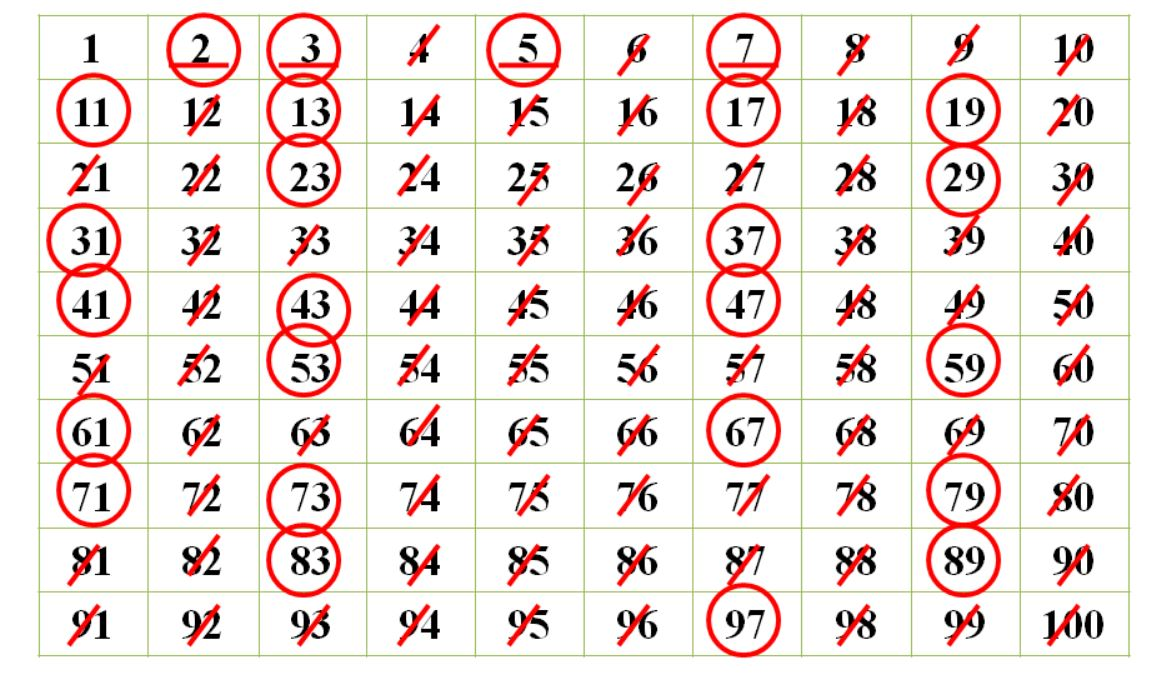

1 — простое число. Как найти еще простые числа? 

Допустим, мы знаем, что 2 тоже простое. Но все, что делится на 2 (содержит 2) уже не простое, поэтому эти числа (4, 6...100) мы сразу выкидываем.

Смотрим на 3 и опять же выкидываем все числа, содержащие 3.

В общем, следуя так дальше, мы сумеем найти все простые числа до 100